## Testing Articulos-v3 TODOS

In [5]:
%load_ext autoreload
%autoreload 2
import json

with open("../../dumps/news-all-v3.json") as f:
    arts = json.load(f)
    
with open("../../dumps/coronavirus-argentina-v3.json") as f:
    just_covid_arts = json.load(f)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
len(arts), len(just_covid_arts)

(195134, 74549)

In [8]:
arts[0].keys()

dict_keys(['_id', 'tweet_id', 'text', 'slug', 'title', 'url', 'user', 'body', 'created_at', 'comments'])

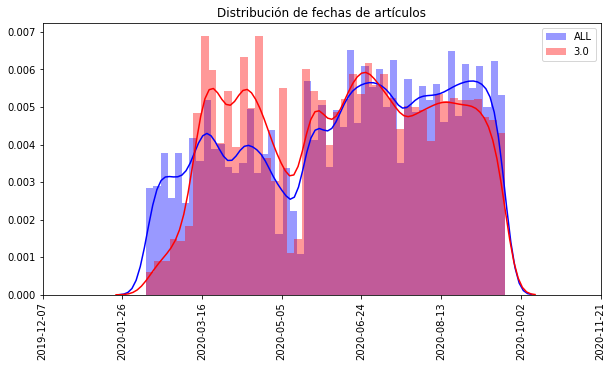

In [9]:
from hate_collector.plot import distplot_dates
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))

distplot_dates([d["created_at"]["$date"] for d in arts], color="blue", label="ALL")
distplot_dates([d["created_at"]["$date"] for d in just_covid_arts], color="red", label="3.0")
plt.legend()

plt.title("Distribución de fechas de artículos");
plt.savefig("distribucion_fechas_3.0.png")

Casi dos meses más de datos

Fecha mínima: 10 de Febrero de 2020

Fecha máxima: 22 de Sept   de 2020


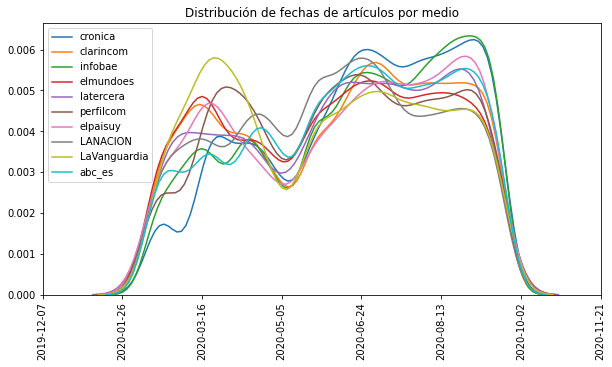

In [15]:
from collections import defaultdict
import datetime

dates_by_newspaper = defaultdict(list)

blacklist = ["laderechamedios", "pagina12", "izquierdadiario", "laderechadiario"]

for art in arts:
    if art["user"] in blacklist:
        continue
    date = datetime.datetime.strptime(art["created_at"]["$date"], "%Y-%m-%dT%H:%M:%SZ")
    dates_by_newspaper[art["user"]].append(date)
    

plt.figure(figsize=(10, 5))

for newspaper, dates in dates_by_newspaper.items():
    distplot_dates(dates, label=newspaper, hist=False)
    
plt.legend()
plt.title("Distribución de fechas de artículos por medio");

plt.savefig("fechas_por_medios_todas.png")


In [13]:
from collections import Counter

counter = Counter(art["user"] for art in arts)


keys = sorted(counter.keys())

for k in counter:
    print(f"{k:<10} -- {counter[k]:<5}")

cronica    -- 19403
clarincom  -- 30738
infobae    -- 39034
elmundoes  -- 19983
latercera  -- 6397 
perfilcom  -- 8145 
elpaisuy   -- 11914
LANACION   -- 16681
LaVanguardia -- 13030
abc_es     -- 23641
izquierdadiario -- 2235 
laderechadiario -- 739  
pagina12   -- 2785 
laderechamedios -- 409  


In [71]:
from mongoengine import connect
from hatespeech_models import Tweet, Article

client = connect("hatespeech-news")
db = client["hatespeech-news"]


article_ids = [art["tweet_id"] for art in arts]

missing_articles = Tweet.objects(
    user_name="lanacion", 
    in_reply_to_status_id=None,
    retweeted_status=None,
    id__nin=article_ids
).order_by("-created_at")

print(f"Faltan {missing_articles.count()} artículos de La Nación")

Faltan 9190 artículos de La Nación


In [76]:
for tw in missing_articles[:50]:
    print("="*80)
    print("\n")
    print(tw.text)



Dólar. Sube pese a que los bancos no pueden venderlo https://t.co/IaHFxoXbCp https://t.co/oSk7Cy4CjE


Licencia. Los jueces desplazados suman presión antes de la reunión de la Corte https://t.co/cTzOaU1mTB https://t.co/fTlCyJqwGc


AOC: un día de campaña con la legisladora millennial que es furor https://t.co/FezoLiPiax https://t.co/5vyiYI76DL


Triste coincidencia: atropelló a un hombre y luego se enteró que era su suegro https://t.co/BchrA0DTKA https://t.co/666aXHWKwk


Medio ambiente. La historia detrás de la foto del ratón en la bota https://t.co/G2jY6tEQtN @LNnaturaleza https://t.co/tCIz8LJycZ


Murió Ramona Galarza, la dama del chamamé, a los 80 años https://t.co/Rbc8wIdMcH https://t.co/0dt4J0fFd1


Traslados de jueces. El Gobierno pide al Consejo ajustar las vacantes https://t.co/3do9FTECsh https://t.co/rwBPHAwdnL


Viajes en avión. Quién gana cuando compramos un pasaje https://t.co/jCKiSuTOLw https://t.co/A6q9wdRTxK


No tenían permiso para circular y le dieron una paliza al 

Juan, sos tonto? ES QUE NO LOS AGARRA EL FILTRO

In [ ]:
for

In [74]:
tweet = missing_articles[0]
nsart = nsarts[0]

tweet.id

1308433940148031489